# Modelling

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import ShuffleSplit
#to ensure clean outputs ignore the warning messages 
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Read the datafile
df = pd.read_csv('03_FE_CHD_data.csv')
df.head()

sysBP       BMI     diaBP   totChol  glucose  heartRate  age_group  \
0 -0.818605  0.320726 -0.800000 -0.684211  -0.0625   0.357143       -1.0   
1 -0.260465  0.675744 -0.066667  0.280702  -0.1250   1.428571        0.0   
2 -0.018605 -0.008069 -0.133333  0.192982  -0.5000   0.000000        0.0   
3  0.818605  0.645487  0.866667 -0.157895   1.5625  -0.714286        2.0   
4  0.074419 -0.459909  0.133333  0.894737   0.4375   0.714286        0.0   

   cigsPerDay  education  gender  TenYearCHD  
0        0.00        1.0     1.0           0  
1        0.00        0.0     0.0           0  
2        1.00       -0.5     1.0           0  
3        1.50        0.5     0.0           1  
4        1.15        0.5     0.0           0

In [16]:
df.describe().T

count      mean       std       min       25%  50%       75%  \
sysBP       3658.0  0.162625  0.821837 -1.655814 -0.409302  0.0  0.590698   
BMI         3658.0  0.081251  0.820091 -1.984871 -0.463944  0.0  0.536056   
diaBP       3658.0  0.061135  0.798284 -2.266667 -0.466667  0.0  0.533333   
totChol     3658.0  0.049960  0.773644 -2.122807 -0.491228  0.0  0.508772   
glucose     3658.0  0.240808  1.494010 -2.375000 -0.437500  0.0  0.562500   
heartRate   3658.0  0.052195  0.855823 -2.214286 -0.500000  0.0  0.500000   
age_group   3658.0  0.400765  0.931108 -1.000000  0.000000  0.0  1.000000   
cigsPerDay  3658.0  0.451271  0.596080  0.000000  0.000000  0.0  1.000000   
education   3658.0 -0.009841  0.511328 -0.500000 -0.500000  0.0  0.500000   
gender      3658.0  0.443685  0.496886  0.000000  0.000000  0.0  1.000000   
TenYearCHD  3658.0  0.152269  0.359331  0.000000  0.000000  0.0  0.000000   

                  max  
sysBP        6.213953  
BMI          6.337872  
diaBP        4.033333  
totChol      6.421053  
glucose     19.750000  
heartRate    4.857143  
age_group    2.000000  
cigsPerDay   3.500000  
education    1.000000  
gender       1.000000  
TenYearCHD   1.000000

In [17]:
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

## Evaluation of different classifiers

### K-Nearest neighbor (KNN)

In [6]:
#run KNN model
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5, n_jobs =4, scoring = 'roc_auc')
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='roc_auc')

In [7]:
print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 42}


In [8]:
#compute roc_auc for the best hyperparameter
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_knn_test= cv_scores_test.mean()
print(cv_scores_knn_test)

0.696594342789995


### Logistic regression

In [9]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001,0.01,0.1,1,5,10,100], 'solver': ['liblinear']}
logreg = LogisticRegression()
logreg_cv= GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [10]:
print("Best Parameters: " + str(logreg_cv.best_params_))

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [11]:
#compute roc_auc for train and test set
logreg = LogisticRegression(penalty = 'l1', C=1, solver='liblinear')
logreg.fit(X_train,y_train)
cv_scores_test= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_logreg_test= cv_scores_test.mean()
print(cv_scores_logreg_test)

0.7324493872754742


### Random forest

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,6,7,8,9,10,15],
    'n_estimators': [10, 50, 100, 200, 300]
}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 15],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='roc_auc')

In [13]:
print("Best Parameters: " + str(rf_cv.best_params_))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}


In [14]:
#compute roc_auc for train and test set
rf = RandomForestClassifier(criterion = 'gini', max_depth=5, n_estimators=200)
rf.fit(X_train,y_train)
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
print(cv_scores_rf_test)

0.717543394326003


### Gradient Boosting

In [15]:
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,200,500,1000],
              'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [100,150],'max_features': [0.3, 0.1]}
GB = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
GB_cv= GridSearchCV(estimator=GB, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
GB_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='roc_auc')

In [16]:
print("Best Parameters: " + str(GB_cv.best_params_))

Best Parameters: {'learning_rate': 0.001, 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 1000}


In [17]:
#compute roc_auc for train and test set
GB = GradientBoostingClassifier(learning_rate=0.001, max_depth= 5, max_features= 0.1, min_samples_leaf= 100, n_estimators= 1000)
GB.fit(X_train,y_train)
cv_scores_test= cross_val_score(GB,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_gbc_test= cv_scores_test.mean()
print(cv_scores_gbc_test)

0.7134621453751888


### Support Vector Machine (SVM)

In [18]:
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
 ]
svm = SVC()
svm_cv= GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

In [19]:
print("Best Parameters: " + str(svm_cv.best_params_))

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [23]:
#compute roc_auc for train and test set
svm = SVC(C=10, kernel = 'rbf', gamma=0.001, probability=True)
svm.fit(X_train,y_train)
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_svm_test= cv_scores_test.mean()
print(cv_scores_svm_test)

0.6677085781433607


### Naive Bayes

In [24]:
GB = GaussianNB()
GB.fit(X_train,y_train)
cv_scores_test= cross_val_score(GB,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_nb_test= cv_scores_test.mean()
print(cv_scores_nb_test)

0.7182848749370488


## Selection of the best model

In [27]:
myLabels = ['KNN','Logistic Regression','Random Forest','Gradient Boost','SVM', 'Naive Bayes']
score_test= [cv_scores_knn_test, cv_scores_logreg_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_svm_test, cv_scores_nb_test]

score_tab = pd.DataFrame(list(zip(myLabels, score_test)), 
               columns =['Algorithm', 'ROC-AUC score']) 
score_tab.sort_values("ROC-AUC score", ascending=False, inplace=True)
score_tab


Algorithm  ROC-AUC score
1  Logistic Regression       0.732449
5          Naive Bayes       0.718285
2        Random Forest       0.717543
3       Gradient Boost       0.713462
0                  KNN       0.696594
4                  SVM       0.667709

When I evaluated different algorithm, I found that __logistic regression__ performed best based on roc_auc score with roc_auc score of 0.73.

In [28]:
#lets check the scoring metrics of logistic regression in more detail
logreg = LogisticRegression(penalty = 'l2', C=0.1, solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       923
           1       0.73      0.06      0.12       175

    accuracy                           0.85      1098
   macro avg       0.79      0.53      0.52      1098
weighted avg       0.83      0.85      0.79      1098

[[919   4]
 [164  11]]


In [29]:
#get the roc_auc_score
y_pred_prob=logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.7409069803436001

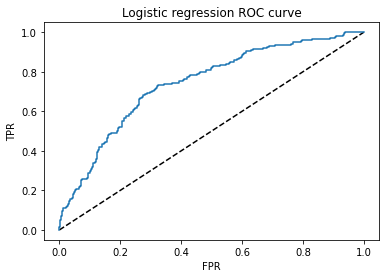

In [30]:
#plot roc curve
fpr,tpr,thresholds=roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='logreg')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic regression ROC curve')
plt.show()

There is an issue with this prediction. The above model has done pretty well in predicting the true negatives. However, the model does miserably poor jobs in predicting the true postives. This is an issue of imbalanced dataset. Our data is highly imbalanced and in such instance, default decision threshold generally performs poorly. Therefore, in the next step, I will tune the threshold to improve recall of the model.

### Tuning the threshold

In this project, I am more interested to correctly identify the people with CHD. That is, I want to maximize the recall value. However, the recall value for positive cases (occurrence of CHD) is very low (0.06). Therefore, in the next step, I will identify the threshold at which the F1 score is maximum by giving more weight to recall (beta = 2) 

In [31]:
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

In [32]:
# Calculate F1 Score Curve
f_beta = []
thresholds = np.arange(0, 1, 0.001)
for t in thresholds:
    adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
    f = fbeta_score(y_test, adjusted_y_pred, beta=2)
    f_beta.append(f)

max_score = max(f_beta)
max_index = f_beta.index(max_score)
print(max_score)
print('optimum threshold', thresholds[max_index])

0.5663716814159293
optimum threshold 0.168


In [33]:
y_pred = (logreg.predict_proba(X_test)[:,1] >= 0.157).astype('int')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       923
           1       0.28      0.74      0.41       175

    accuracy                           0.65      1098
   macro avg       0.60      0.69      0.58      1098
weighted avg       0.82      0.65      0.70      1098

[[590 333]
 [ 46 129]]


### Plot demonstrating F1 score, precision and recall at different thresholds

In [34]:
pred_prob_lr = logreg.predict_proba(X_test)[:,1]

In [35]:
# Calculate Precision and Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
thresholds = np.append(thresholds, 1)

In [36]:
# Calculate F1 Score Curve
f1_points = []

for t in thresholds:
        adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
        new_f1 = f1_score(y_test, adjusted_y_pred)
        f1_points.append(new_f1)

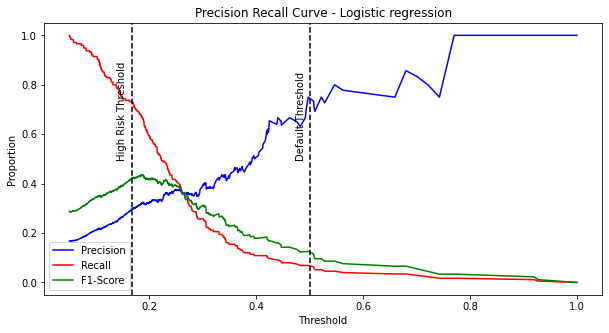

In [38]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, precision, color='blue')
plt.plot(thresholds, recall, color='red')
plt.plot(thresholds, f1_points, color='green')
plt.title('Precision Recall Curve - Logistic regression')
plt.legend(('Precision', 'Recall', 'F1-Score'))
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.axvline(x=.168, color='black', linestyle='--')
plt.text(.14,.50,'High Risk Threshold',rotation=90)
plt.axvline(x=.50, color='black', linestyle='--')
plt.text(.475,.50,'Default Threshold',rotation=90)
plt.show()

## Will undersampling perform better?

In [48]:
#join the training dataset
new_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [49]:
#count the number of rows for each class
new_df.TenYearCHD.value_counts()

1    2173
0    2168
Name: TenYearCHD, dtype: int64

In [50]:
# Shuffle the new df
shuffled_df = new_df.sample(frac=1,random_state=4)
# Put all the CHD in a separate dataset
CHD_df = new_df.loc[new_df['TenYearCHD'] == 1]

In [51]:
#Randomly select 437 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=382,random_state=42)

# Concatenate both dataframes again
resampled_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
resampled_df.TenYearCHD.value_counts()

1    2173
0     382
Name: TenYearCHD, dtype: int64

In [52]:
models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
        ]
names=[]
roc_auc_score = []
f1_score=[]
precision_score=[]
recall_score=[]
for name, model in models:
        roc_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
        f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
        precision = cross_val_score(model, X, y, cv=5, scoring='precision')
        recall = cross_val_score(model, X, y, cv=5, scoring='recall')
        clf = model.fit(X, y)
        y_pred = clf.predict(X_test)
        names.append(name)
        roc_auc_score.append(roc_auc.mean())
        f1_score.append(f1.mean())
        precision_score.append(precision.mean())
        recall_score.append(recall.mean())
        #print(classification_report(y_test, y_pred, target_names=target_names))

In [53]:
score = pd.DataFrame([names, roc_auc_score, f1_score, precision_score, recall_score]).T
score.columns = ['Algorithm', 'Roc_auc_score', 'F1_score', 'Precision', 'Recall']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

Algorithm Roc_auc_score  F1_score Precision    Recall
1  Logistic Regression       0.72412  0.121409  0.613773  0.068211
5          Naive Bayes       0.72017  0.287249  0.391849  0.228008
3       Gradient Boost      0.703193  0.147255   0.47958  0.096895
2        Random Forest      0.693798  0.100949  0.447446  0.066409
4                  SVM      0.614592  0.027055  0.366667  0.014382
0                  KNN      0.611563  0.149335  0.331815  0.096976

In [54]:
#fit the best model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       933
           1       0.69      0.70      0.70       928

    accuracy                           0.69      1861
   macro avg       0.69      0.69      0.69      1861
weighted avg       0.69      0.69      0.69      1861

[[637 296]
 [276 652]]


Logistic regression with Undersampling did not perform better than the complete dataset.

## Will over-sampling using SMOTE perform better?

In [42]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({0: 3101, 1: 557})


In [43]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 3101, 1: 3101})


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [45]:
models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
        ]
names=[]
roc_auc_score = []
f1_score=[]
precision_score=[]
recall_score=[]
for name, model in models:
        roc_auc = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc')
        f1 = cross_val_score(model, X_res, y_res, cv=5, scoring='f1')
        precision = cross_val_score(model, X_res, y_res, cv=5, scoring='precision')
        recall = cross_val_score(model, X_res, y_res, cv=5, scoring='recall')
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        names.append(name)
        roc_auc_score.append(roc_auc.mean())
        f1_score.append(f1.mean())
        precision_score.append(precision.mean())
        recall_score.append(recall.mean())
        #print(classification_report(y_test, y_pred, target_names=target_names))

In [46]:
score = pd.DataFrame([names, roc_auc_score, f1_score, precision_score, recall_score]).T
score.columns = ['Algorithm', 'Roc_auc_score', 'F1_score', 'Precision', 'Recall']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

Algorithm Roc_auc_score  F1_score Precision    Recall
2        Random Forest      0.972894  0.903103   0.91434  0.905493
0                  KNN      0.922057  0.839759   0.73581  0.978068
3       Gradient Boost      0.916602  0.785106  0.853316   0.77293
4                  SVM      0.787982  0.715745  0.692041  0.741369
1  Logistic Regression      0.729343  0.686846  0.675223  0.699124
5          Naive Bayes      0.713203   0.55093  0.695179  0.456305

In [47]:
#fit the best model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       933
           1       0.92      0.88      0.90       928

    accuracy                           0.90      1861
   macro avg       0.90      0.90      0.90      1861
weighted avg       0.90      0.90      0.90      1861

[[858  75]
 [110 818]]


Logistic regression with oversampling also did not perform better than the complete dataset. Therefore, our final model is logistic regression with full dataset using threshold of 0.168.

## Data quantity assessment

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim, cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
    plt.legend(loc="best")
    return plt

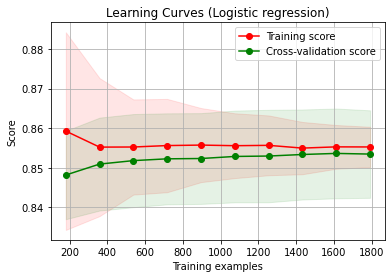

In [37]:
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
title = "Learning Curves (Logistic regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = LogisticRegression(penalty = 'l1', C=1, solver='liblinear', random_state=1)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.8, 1),
                    cv=cv, n_jobs=4)

plt.show()

The above plot shows that training and cross-validation scores are converging together which suggest that additional data will probably not imporove the model.